In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [40]:
df['is_GP'] = np.where(df['school'] == 'GP', 1, 0)
df['is_MS'] = np.where(df['school'] == 'MS', 1, 0)

df.filter(items=['school', 'is_GP', 'is_MS'])

,school,is_GP,is_MS
0,GP,1,0
1,GP,1,0
2,GP,1,0
3,GP,1,0
4,GP,1,0
...,...,...,...
390,MS,0,1
391,MS,0,1
392,MS,0,1
393,MS,0,1


In [41]:
X = df.filter(items=['is_GP', 'is_MS', 'studytime', 'age', 'absences', 'freetime', 'traveltime', 'failures', 'Medu', 'Fedu', 'famrel', 'goout', 'Dalc', 'Walc', 'health']).to_numpy()
Y = df.filter(items=['G3']).to_numpy()

In [42]:
X.shape, Y.shape

((395, 15), (395, 1))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((316, 15), (79, 15), (316, 1), (79, 1))

In [44]:
from neural_network import NeuralNetwork
from loss.mse import MSE
from layer import Layer
from activation.tanh import Tanh
from activation.relu import ReLU


nn = NeuralNetwork(MSE)
nn.add(Layer(15, 7))
nn.add(Tanh())
nn.add(Layer(7, 4))
nn.add(ReLU())
nn.add(Layer(4, 1))


print(nn)
losses = nn.train(X_train, Y_train, epochs=2000, learning_rate=0.001)
print(nn)

-----
Layer (15, 7)
Weights
[[-0.07034778  0.07796557  0.04277526  0.02157919 -0.04561366  0.02376348
  -0.08545435]
 [ 0.15042553 -0.02688677  0.00799802  0.08049401 -0.03375419  0.03259338
   0.03187468]
 [ 0.06439148 -0.02617425 -0.03704203  0.07752969 -0.07639636 -0.10639154
   0.05544614]
 [-0.12669569 -0.02500619 -0.06391593  0.07999594  0.08250971 -0.0471152
   0.1324724 ]
 [-0.02072158 -0.00746631  0.04469211 -0.03881193 -0.00862629 -0.07834121
   0.02583103]
 [-0.01449538  0.08460209 -0.04540421 -0.16227974 -0.02157302  0.00021303
  -0.01411817]
 [-0.05527809 -0.0840568   0.00134863  0.06725874 -0.07781269  0.031027
  -0.04538061]
 [ 0.00899731 -0.03681013 -0.02174139 -0.06638245 -0.02836309 -0.02003958
   0.08706698]
 [ 0.01633372  0.05942847  0.03920876 -0.06283696 -0.08702753  0.13677748
   0.0990819 ]
 [-0.00854179  0.03727366  0.05544676 -0.0193896  -0.03552085 -0.0043162
   0.00149508]
 [-0.01621825 -0.04798961 -0.0394264   0.02789495  0.00590845 -0.05852984
   0.0129772

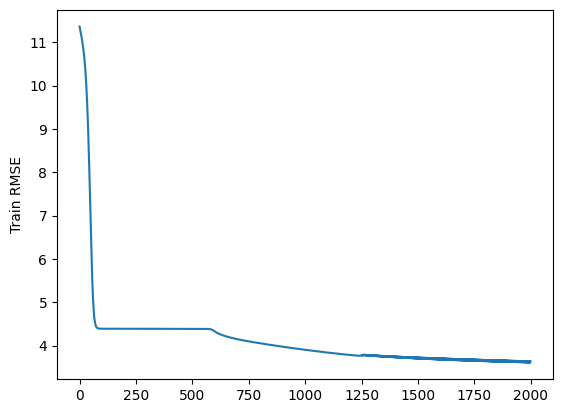

train: 2.891964845469502 3.6109301699769065
test: 4.105385823332851 5.068090534457767


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from loss.mae import MAE

plt.ylabel('Train RMSE')
plt.plot(np.sqrt(losses))
plt.show()

prediction = nn.forward(X_test)
mse = MSE.loss(prediction, Y_test)
rmse = np.sqrt(mse)
mae = MAE().loss(prediction, Y_test)
print('train:', MAE().loss(nn.forward(X_train), Y_train), np.sqrt(MSE.loss(nn.forward(X_train), Y_train)))
print('test:', mae, rmse)

In [46]:
nn.forward(X_train)

array([[ 9.72010579],
       [11.51033795],
       [ 4.52448107],
       [11.50869024],
       [11.36496446],
       [ 8.85550516],
       [11.45513486],
       [10.06168271],
       [10.40366628],
       [ 8.9196449 ],
       [ 5.53356819],
       [11.50260044],
       [ 7.42980071],
       [ 2.96062796],
       [10.32137536],
       [ 3.2062632 ],
       [11.47862038],
       [11.50769258],
       [10.90103032],
       [11.51139255],
       [11.50911244],
       [11.50971874],
       [11.51147344],
       [ 7.14451481],
       [ 2.27501771],
       [11.51138088],
       [11.44579864],
       [11.19558141],
       [ 2.21019592],
       [ 9.50576513],
       [ 2.20921556],
       [10.74236624],
       [11.5025986 ],
       [11.51030135],
       [11.50546585],
       [ 2.4430718 ],
       [11.40131884],
       [10.76068679],
       [ 4.2675817 ],
       [11.50695544],
       [11.50703368],
       [11.37467898],
       [11.44321354],
       [10.91552668],
       [ 2.29253939],
       [ 9